# Carga Datos
---

In [64]:
import pandas as pd

# Definir la ruta relativa al archivo de datos
# Desde la carpeta /notebooks, subimos un nivel ('..') y luego bajamos a /data/raw/
ruta_archivo = '../data/raw/train.csv'

# Cargar el dataset en un DataFrame de pandas
df = pd.read_csv(ruta_archivo)

# Análisis Exploratorio de Datos (EDA)
---

In [65]:
# Mostrar las primeras 5 filas para una inspección visual rápida
print("--- Primeras 5 filas del dataset ---")
display(df.head())

# Obtener la información básica del DataFrame
print("\n--- Información básica del DataFrame ---")
df.info()

--- Primeras 5 filas del dataset ---


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



--- Información básica del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

## Análisis Estadístico Descriptivo de SalePrice

In [66]:
# 1. Estadísticas descriptivas básicas
sale_price_stats = df['SalePrice'].describe()
print("--- Estadísticas Descriptivas de SalePrice ---")
print(sale_price_stats)

# 2. Asimetría y Curtosis
skewness = df['SalePrice'].skew()
kurtosis = df['SalePrice'].kurt()

print(f"\nAsimetría (Skewness): {skewness:.2f}")
print(f"Curtosis (Kurtosis): {kurtosis:.2f}")

--- Estadísticas Descriptivas de SalePrice ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetría (Skewness): 1.88
Curtosis (Kurtosis): 6.54


### Conclusión del Análisis Estadístico

El análisis descriptivo de `SalePrice` revela información clave sobre su distribución. El precio medio de una vivienda es de **\$180,921**, mientras que la mediana se sitúa en **\$163,000**. El hecho de que la media sea notablemente superior a la mediana es un claro indicador de una **asimetría positiva**.

Esta observación se confirma con un valor de **Asimetría (Skewness) de 1.88**, lo que demuestra que la distribución tiene una larga cola a la derecha, causada por un número de viviendas con precios excepcionalmente altos. Adicionalmente, una **Curtosis de 6.54** (muy superior al valor de 3 para una distribución normal) indica que la distribución es más "puntiaguda" y posee colas más pesadas, reforzando la evidencia de la presencia de valores atípicos (outliers).

## Análisis Gráfico de SalePrice

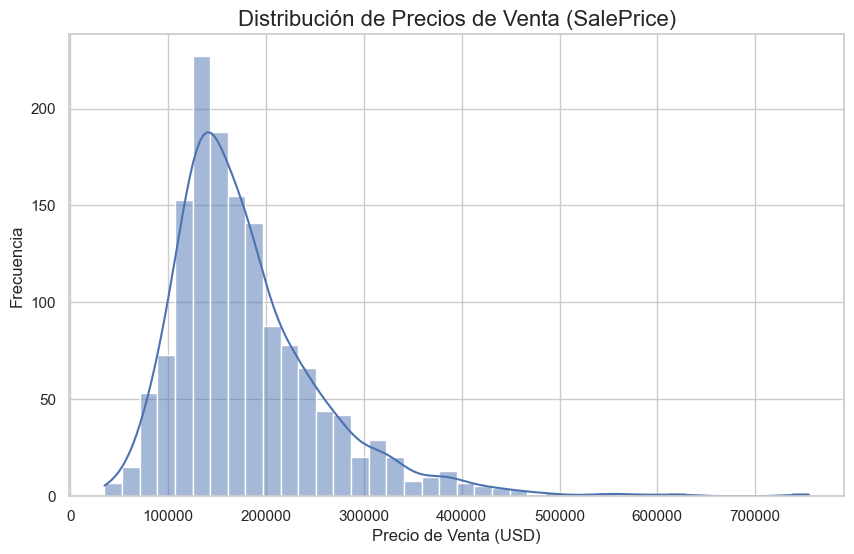

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Crear el histograma y el gráfico de densidad
sns.histplot(df['SalePrice'], kde=True, bins=40)

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Precios de Venta (SalePrice)', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

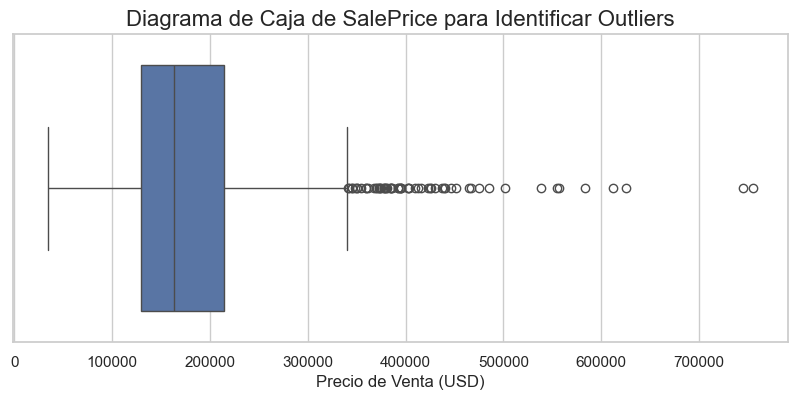

In [68]:
plt.figure(figsize=(10, 4))

# Crear el box plot
sns.boxplot(x=df['SalePrice'])

# Añadir títulos y etiquetas
plt.title('Diagrama de Caja de SalePrice para Identificar Outliers', fontsize=16)
plt.xlabel('Precio de Venta (USD)', fontsize=12)

# Mostrar el gráfico
plt.show()

### Conclusión del Análisis Gráfico
Las visualizaciones de la variable `SalePrice` confirman de manera inequívoca los hallazgos del análisis estadístico.

El **histograma** muestra claramente una distribución con **asimetría positiva**. La mayor concentración de viviendas se encuentra en el rango de precios más bajos (aproximadamente entre **\$100,000** y **\$200,000**), con una frecuencia que disminuye progresivamente a medida que los precios aumentan, formando una "cola" larga hacia la derecha.

El **diagrama de caja (box plot)** complementa esta visión de forma contundente. La caja, que representa el 50% central de los datos, se sitúa en la parte baja del rango total de precios. Más importante aún, se observa una cantidad considerable de puntos individuales a la derecha de los bigotes, lo que representa visualmente los valores atípicos (**outliers**): viviendas con un precio de venta muy superior al de la gran mayoría.

En conjunto, ambos gráficos nos llevan a la misma conclusión: estamos trabajando con una variable objetivo que **no es normal** y que presenta **valores extremos** que deberán ser gestionados en fases posteriores del proyecto.

## Análisis de Correlación: Descubriendo Relaciones Clave

Ahora que comprendemos nuestra variable objetivo (`SalePrice`), el siguiente paso es identificar qué otras variables del dataset tienen una relación lineal fuerte con ella. No todas las 80 variables influirán de la misma manera en el precio de una casa. Descubrir las más influyentes nos permitirá centrar nuestros futuros análisis y esfuerzos de modelado.

### Objetivo:
Identificar las variables numéricas que están más fuertemente correlacionadas (positiva o negativamente) con `SalePrice`.

### Herramienta:
Para ello, vamos a calcular la **matriz de correlación** de todas las variables numéricas. Luego, visualizaremos esta matriz usando un **mapa de calor (heatmap)**. El mapa de calor es una herramienta gráfica excepcional que utiliza colores para representar la fuerza de la correlación, permitiéndonos detectar patrones de un solo vistazo.

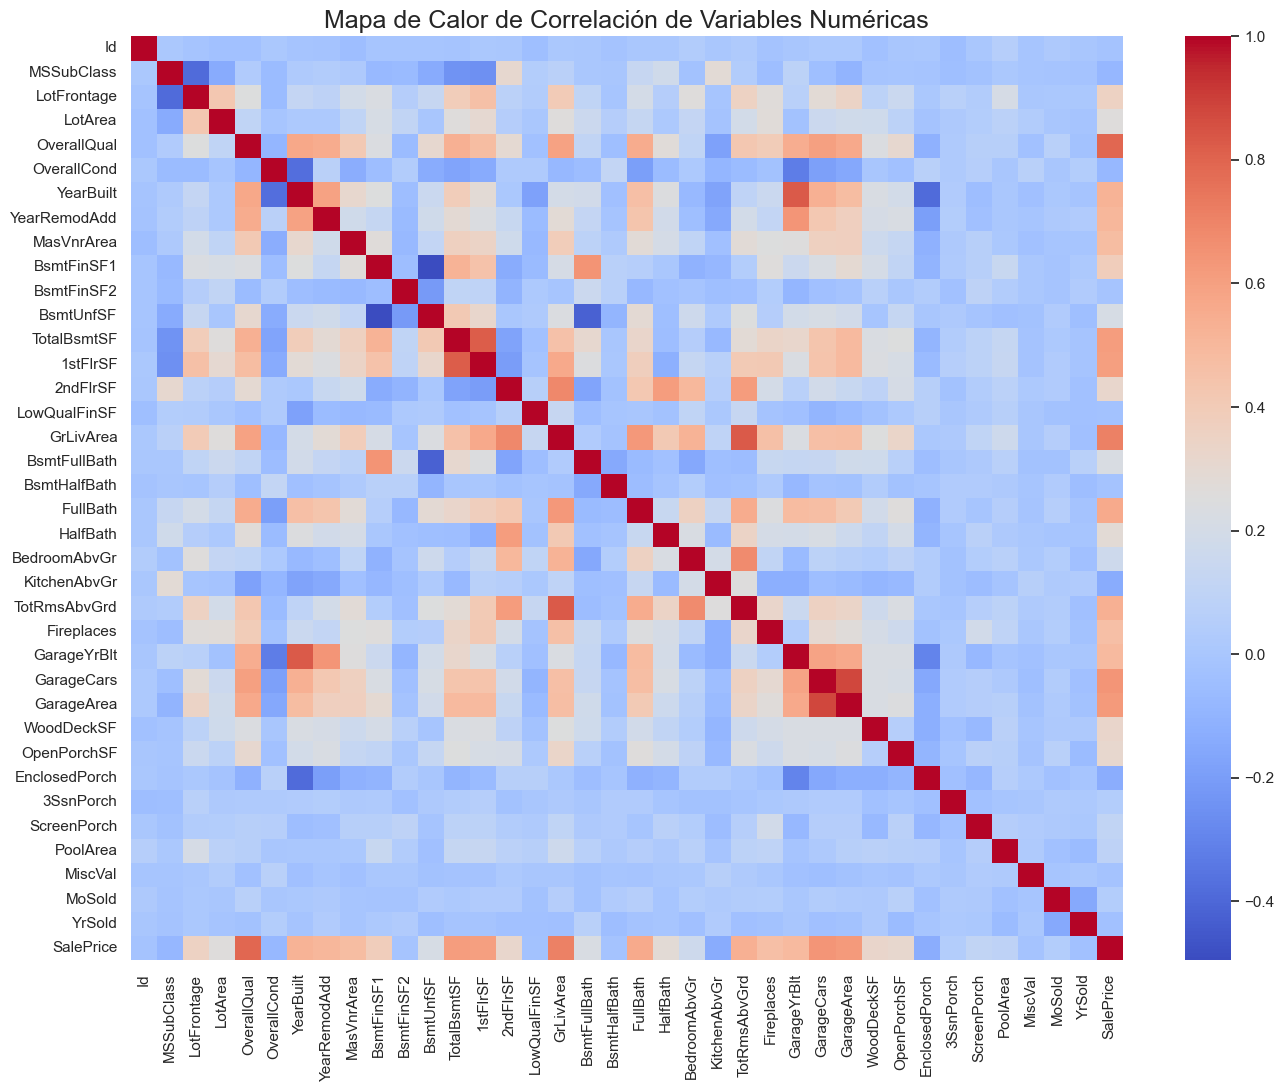

In [69]:
import numpy as np

# 1. Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df.select_dtypes(include=np.number)

# 2. Calcular la matriz de correlación sobre el DataFrame numérico
correlation_matrix = numeric_df.corr()

# 3. Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(16, 12))

# 4. Generar el mapa de calor
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)

# 5. Añadir un título
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=18)

# 6. Mostrar el gráfico
plt.show()

## Análisis del Mapa de Calor y Principales Hallazgos

Este mapa de calor nos proporciona una visión panorámica de las relaciones lineales entre todas las variables numéricas. Nuestro foco principal está en la última fila (o columna), `SalePrice`, para identificar qué variables tienen el mayor impacto en el precio de venta.

Los hallazgos clave son:

### Fuertes Correlaciones Positivas con `SalePrice`:
Observamos varios cuadrados de color rojo intenso en la fila de `SalePrice`, lo que indica una fuerte correlación positiva. Las variables más importantes son:
* **`OverallQual` (Calidad General):** Es, con diferencia, la variable con la correlación positiva más fuerte. A mayor calidad de los materiales y acabados, mayor es el precio de venta.
* **`GrLivArea` (Área habitable sobre rasante):** Cuantos más metros cuadrados habitables tiene la casa, más cara es. Una relación muy intuitiva.
* **`GarageCars` y `GarageArea` (Capacidad y Área del Garaje):** Ambas están fuertemente correlacionadas con el precio. Casas con garajes más grandes y para más coches tienden a ser más caras.
* **`TotalBsmtSF` (Área Total del Sótano) y `1stFlrSF` (Área del Primer Piso):** El tamaño de la planta baja y del sótano también son predictores muy importantes del precio.

### Identificación de Multicolinealidad:
El mapa también revela fuertes correlaciones entre las propias variables predictoras, un fenómeno llamado **multicolinealidad**. Esto es importante tenerlo en cuenta para el futuro modelado. Los ejemplos más claros son:
* **`GarageCars` y `GarageArea`:** El cuadrado donde se cruzan es de un rojo muy intenso. Es lógico: un garaje para más coches suele ser más grande. Para un modelo, usar ambas variables podría ser redundante.
* **`TotalBsmtSF` y `1stFlrSF`:** También están muy correlacionadas.
* **`GrLivArea` y `TotRmsAbvGrd` (Total de habitaciones):** Más habitaciones suelen implicar más área habitable.

### Variables con Poca Influencia:
Muchas variables tienen colores muy cercanos al blanco, lo que indica una correlación cercana a cero (ej. `MSSubClass`, `MoSold`). Estas, a priori, parecen tener poca o ninguna relación lineal con el precio de venta.

## Análisis Visual Bivariante de las Variables de Mayor Impacto

### Objetivos y Metodología

Tras la identificación de las variables numéricas con mayor coeficiente de correlación de Pearson respecto a `SalePrice` mediante el mapa de calor, se procede a una inspección visual detallada de dichas relaciones. El objetivo de esta fase es validar y caracterizar la naturaleza de estas correlaciones, yendo más allá de la mera cuantificación lineal. Un análisis gráfico permite identificar patrones no lineales, heterocedasticidad y la presencia de posibles valores atípicos (**outliers**) que no son evidentes únicamente a través del coeficiente de correlación.

Para este fin, se han seleccionado las dos variables con la correlación positiva más elevada:

* `OverallQual`: Una variable de tipo ordinal que representa la calidad general de la vivienda.
* `GrLivArea`: Una variable continua que indica el área habitable sobre el nivel del suelo.

La metodología de visualización se ha adaptado a la naturaleza de cada variable:

* Para la relación `SalePrice` vs. `OverallQual`, se empleará un **diagrama de cajas (box plot)**. Esta técnica es idónea para visualizar la distribución de una variable continua (`SalePrice`) a través de las diferentes categorías de una variable ordinal (`OverallQual`), permitiendo comparar medianas, rangos intercuartílicos y la dispersión de precios para cada nivel de calidad.

* Para la relación `SalePrice` vs. `GrLivArea`, se utilizará un **diagrama de dispersión (scatter plot)**, complementado con una línea de regresión. Este gráfico es el estándar para examinar la relación entre dos variables continuas, permitiendo evaluar la linealidad de la tendencia y la dispersión de los datos alrededor de la misma.

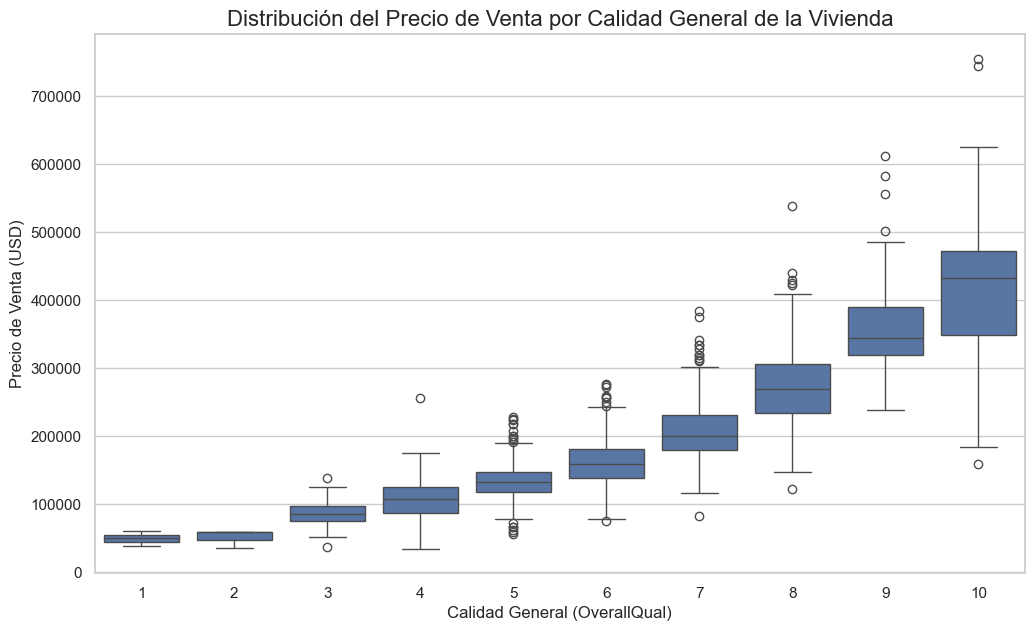

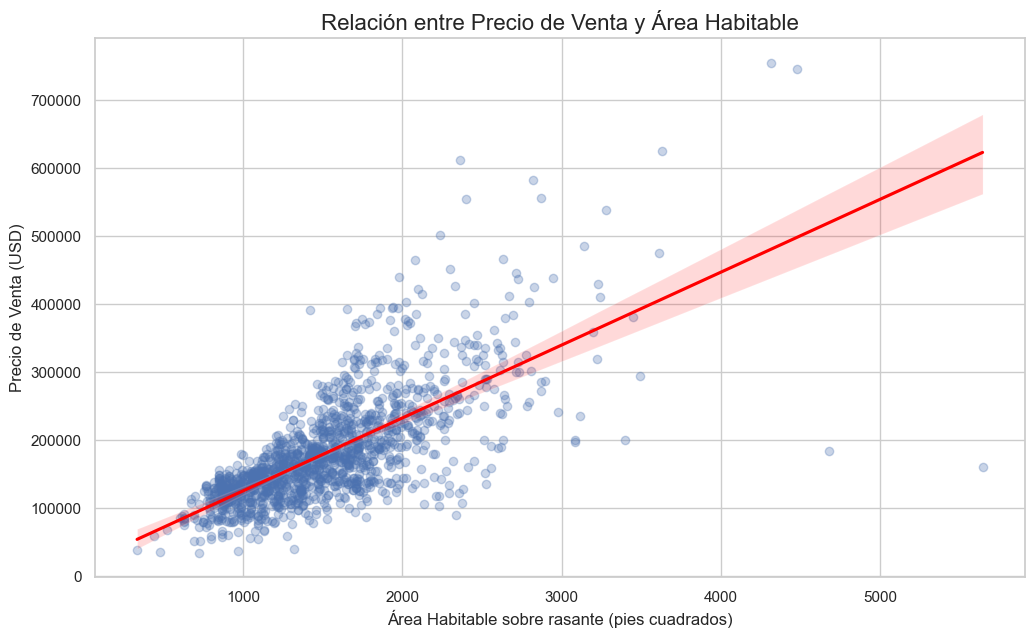

In [70]:


# Configuración del estilo visual para los gráficos
sns.set_theme(style="whitegrid")

# --- Gráfico 1: Relación SalePrice vs. OverallQual (Diagrama de Cajas) ---

plt.figure(figsize=(12, 7))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

plt.title('Distribución del Precio de Venta por Calidad General de la Vivienda', fontsize=16)
plt.xlabel('Calidad General (OverallQual)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

plt.savefig('calidad_vs_precio.png', dpi=300, bbox_inches='tight')
plt.show()


# --- Gráfico 2: Relación SalePrice vs. GrLivArea (Diagrama de Dispersión) ---

plt.figure(figsize=(12, 7))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, 
            scatter_kws={'alpha':0.3}, # Ajuste de transparencia para visualizar densidad
            line_kws={'color':'red'}) # Superposición de la línea de regresión lineal

plt.title('Relación entre Precio de Venta y Área Habitable', fontsize=16)
plt.xlabel('Área Habitable sobre rasante (pies cuadrados)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)

plt.savefig('area_vs_precio.png', dpi=300, bbox_inches='tight')
plt.show()

## Análisis de Resultados Visuales

La inspección de los gráficos generados permite confirmar y profundizar en la comprensión de las relaciones entre las variables predictoras más correlacionadas y el precio de venta.

### Relación entre `SalePrice` y `OverallQual`

El diagrama de cajas revela una **relación monotónica positiva** muy fuerte entre la calidad general de la vivienda y su precio de venta. Se observa que a medida que la categoría de `OverallQual` aumenta, la mediana del `SalePrice`, representada by la línea central de cada caja, se incrementa de forma consistente.

Adicionalmente, el gráfico evidencia un patrón de **heterocedasticidad**: la dispersión de los precios de venta (representada por la altura de las cajas y la longitud de los bigotes) aumenta a medida que se incrementa la calidad. Esto sugiere que, si bien las viviendas de baja calidad tienen precios más homogéneos, existe una variabilidad de precios considerablemente mayor entre las viviendas de alta calidad.

### Relación entre `SalePrice` y `GrLivArea`

El diagrama de dispersión confirma la existencia de una **relación lineal positiva y robusta** entre el área habitable y el precio de venta. La línea de regresión superpuesta muestra una clara pendiente ascendente, indicando que a mayor área, mayor es el precio esperado.

No obstante, se identifican dos aspectos cruciales:

* **Heterocedasticidad**: Al igual que en el caso anterior, la dispersión de los puntos aumenta a medida que `GrLivArea` se incrementa. Los precios para viviendas de menor tamaño se encuentran más concentrados, mientras que para viviendas de mayor tamaño la variabilidad de precios es mucho más pronunciada.
* **Posibles Outliers Influyentes**: Se destacan dos observaciones en la esquina inferior derecha del gráfico. Estos puntos corresponden a viviendas con un área habitable (`GrLivArea`) excepcionalmente grande (> 4000 pies cuadrados) pero con un precio de venta comparativamente bajo. Estos datos atípicos son de especial interés, ya que podrían ejercer una influencia desproporcionada en el ajuste de un modelo de regresión lineal y suponen una desviación del patrón general.

### Conclusión Parcial

El análisis bivariante visual no solo valida la alta correlación de `OverallQual` y `GrLivArea` con `SalePrice`, sino que también revela complejidades importantes en estas relaciones, como la **heterocedasticidad** y la presencia de **outliers significativos**. Estos hallazgos serán fundamentales durante la fase de pre-procesamiento de datos y la selección del modelo, ya que sugieren que un modelo lineal simple podría no capturar adecuadamente toda la estructura de los datos sin realizar transformaciones o un tratamiento específico de los valores atípicos.

## Análisis de Variables Categóricas: Influencia del Vecindario

### Objetivos y Metodología

Habiendo caracterizado las relaciones de las principales variables numéricas con `SalePrice`, el análisis exploratorio se extiende ahora a las variables categóricas. El objetivo es determinar cómo la pertenencia a una categoría específica influye en la distribución del precio de venta. La variable `Neighborhood` (vecindario) ha sido seleccionada para este análisis inicial, dada su alta relevancia teórica en la valoración de bienes inmuebles.

La metodología consistirá en visualizar la distribución de `SalePrice` para cada una de las categorías de `Neighborhood` mediante un **diagrama de cajas (box plot)**. Para facilitar la interpretación y la comparación visual, los vecindarios se ordenarán en el eje horizontal según su mediana de precio de venta, de menor a mayor. Esta ordenación permitirá identificar de forma clara y sistemática qué vecindarios se asocian a los precios más bajos, medios y altos, así como comparar la dispersión de precios dentro de cada uno.

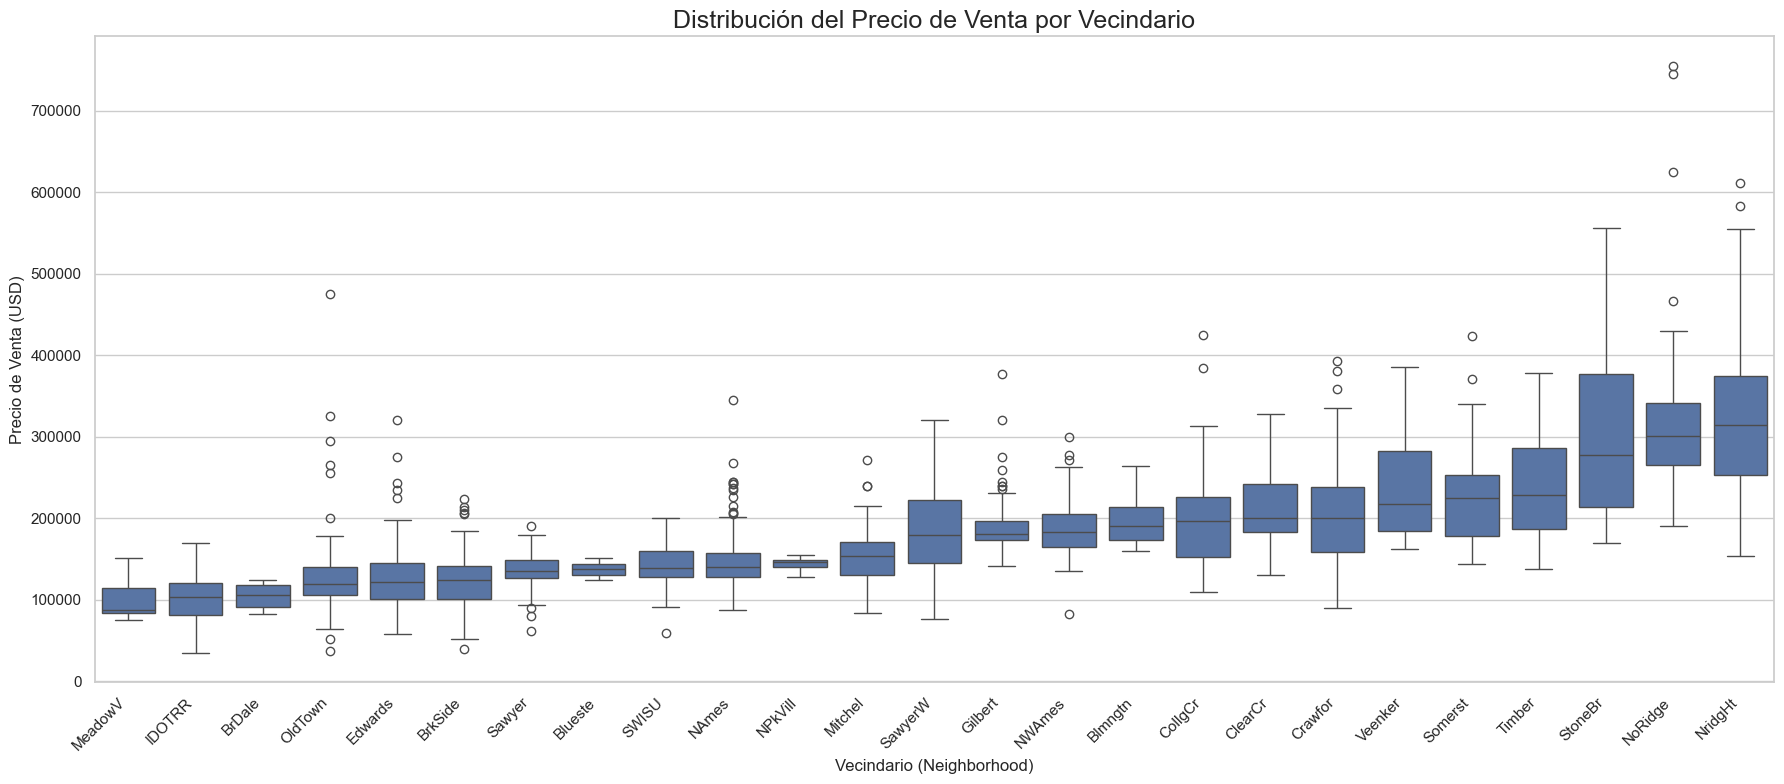

In [71]:

sns.set_theme(style="whitegrid")

# 1. Determinar el orden de los vecindarios según la mediana del precio de venta
neighborhood_order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index

# 2. Configurar la figura para el gráfico
# Se utiliza un tamaño más ancho para acomodar todos los vecindarios
plt.figure(figsize=(18, 8))

# 3. Generar el diagrama de cajas
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=neighborhood_order)

# 4. Ajustar etiquetas para mejorar la legibilidad
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X
plt.title('Distribución del Precio de Venta por Vecindario', fontsize=18)
plt.xlabel('Vecindario (Neighborhood)', fontsize=12)
plt.ylabel('Precio de Venta (USD)', fontsize=12)
plt.tight_layout() # Ajusta el gráfico para que todo encaje correctamente

# 5. Guardar y mostrar el gráfico
plt.savefig('vecindario_vs_precio.png', dpi=300)
plt.show()

## Análisis de Resultados: `SalePrice` por `Neighborhood`

La visualización de la distribución de `SalePrice` a través de las diferentes categorías de `Neighborhood` confirma de manera contundente la hipótesis de que la ubicación es un factor determinante en el precio de la vivienda. El ordenamiento de los vecindarios según su mediana de precio revela una clara y progresiva escalera de valorización.

Del análisis del gráfico se desprenden las siguientes conclusiones clave:

* **Fuerte poder predictivo**: La variación en los precios medianos entre los vecindarios más económicos (ej. `MeadowV`, `BrDale`) y los más costosos (ej. `NridgHt`, `NoRidge`, `StoneBr`) es sustancial. Esta marcada diferencia subraya el alto poder predictivo de esta variable categórica.

* **Segmentación de vecindarios**: El gráfico permite una clara segmentación de los vecindarios en, al menos, tres niveles: de precio bajo, medio y alto. Esta agrupación podría ser de gran utilidad en la fase de ingeniería de características (*feature engineering*), donde los vecindarios podrían ser agrupados en "tiers" para simplificar el modelo.

* **Variabilidad en la dispersión de precios**: Se observa una notable diferencia en la dispersión de precios (rango intercuartílico) entre los distintos vecindarios. Localidades como `StoneBr` y `NridgHt` no solo presentan los precios medianos más altos, sino también una gran variabilidad, lo que sugiere una mayor heterogeneidad en el tipo y tamaño de las viviendas dentro de esos vecindarios. Por el contrario, los vecindarios más económicos tienden a presentar precios más homogéneos.

### Conclusión Parcial

El análisis confirma que la variable `Neighborhood` es un predictor fundamental de `SalePrice`. Cualquier modelo predictivo que se desarrolle deberá incorporar esta información de manera efectiva para alcanzar un rendimiento óptimo.

## Diagnóstico de Calidad de Datos: Análisis de Valores Nulos

### Objetivos y Metodología

Una fase fundamental del Análisis Exploratorio de Datos consiste en la evaluación de la completitud del dataset. El resumen inicial (`.info()`) ya indicaba la presencia de valores nulos en varias columnas. El objetivo de este apartado es cuantificar sistemáticamente la magnitud de estos datos faltantes para cada variable y presentar los resultados de una manera que facilite la toma de decisiones en la fase de pre-procesamiento.

La metodología a seguir será:

* **Calcular el porcentaje de valores nulos** para cada una de las columnas del dataset.
* **Filtrar y seleccionar** únicamente aquellas columnas que presenten un porcentaje de datos faltantes superior a cero.
* **Visualizar estos resultados** en un gráfico de barras ordenado de forma descendente. Esta representación visual permitirá identificar de manera inmediata las variables con mayor incidencia de valores nulos, las cuales requerirán una estrategia de imputación o eliminación en la siguiente etapa del proyecto.

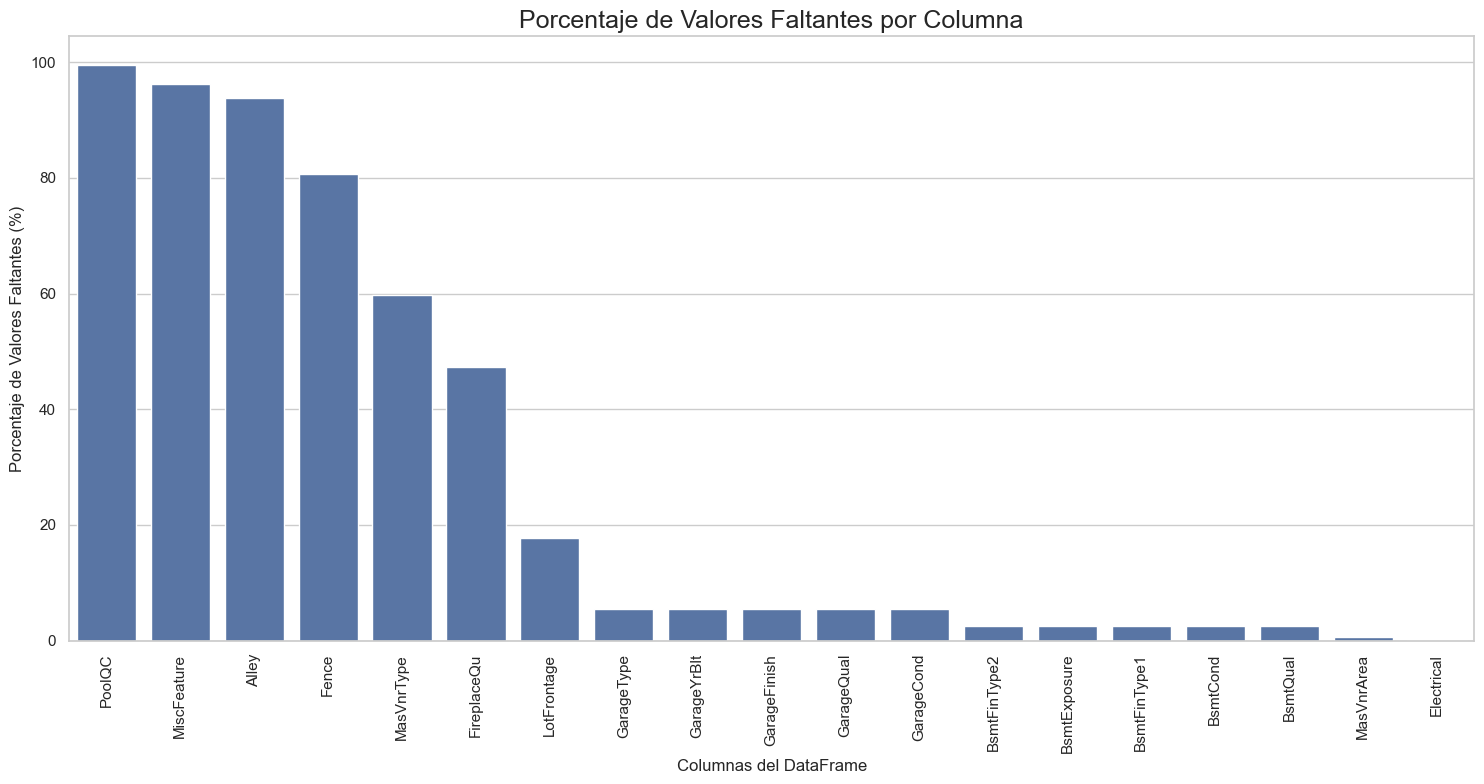

In [72]:

# 1. Calcular el porcentaje de valores nulos por columna
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / len(df)) * 100

# 2. Ordenar los resultados de mayor a menor
missing_percentage.sort_values(ascending=False, inplace=True)

# 3. Configurar y generar el gráfico
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)

# 4. Ajustar títulos y etiquetas
plt.xticks(rotation=90) # Rotar etiquetas para que no se solapen
plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=18)
plt.xlabel('Columnas del DataFrame', fontsize=12)
plt.ylabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.tight_layout()

# 5. Guardar y mostrar el gráfico
plt.savefig('valores_faltantes.png', dpi=300)
plt.show()

## Análisis de Resultados: Valores Faltantes

El análisis cuantitativo de valores nulos revela que, si bien una porción significativa de las variables del dataset está afectada, la naturaleza de estos datos faltantes no es uniforme. Es posible clasificar las variables en tres grupos distintos según la proporción y el significado de sus valores nulos.

### Grupo 1: Alta Proporción de Nulos (>80%)
Las variables `PoolQC`, `MiscFeature`, `Alley` y `Fence` presentan un porcentaje de ausencia superior al 80%. Sin embargo, al consultar el fichero `data_description.txt`, se constata que en estos casos el valor `NaN` no representa una omisión de información, sino una categoría en sí misma. Por ejemplo, un valor nulo en `PoolQC` significa que la vivienda **no tiene piscina**. Por lo tanto, estos no son datos "faltantes", sino datos con significado que deberán ser tratados como una categoría específica (ej. "None") en la fase de pre-procesamiento.

### Grupo 2: Proporción Moderada de Nulos (5-50%)
En este grupo destacan `FireplaceQu` (Calidad de la chimenea) y `LotFrontage` (Pies lineales de calle conectados a la propiedad).
* Al igual que en el grupo anterior, un `NaN` en `FireplaceQu` indica la **ausencia de chimenea**.
* En cambio, los valores faltantes en `LotFrontage` parecen ser datos **genuinamente ausentes** que requerirán una estrategia de imputación (p. ej., utilizando la mediana del vecindario).

### Grupo 3: Baja Proporción de Nulos (<5%)
Este grupo incluye un conjunto de variables relacionadas con el garaje (`Garage...`), el sótano (`Bsmt...`), el revestimiento de mampostería (`MasVnr...`) y una única entrada en `Electrical`. En la mayoría de estos casos (garaje, sótano, revestimiento), el valor `NaN` también indica la ausencia del elemento constructivo. Las pocas entradas restantes pueden ser tratadas con técnicas de imputación simples (la moda o la mediana) sin introducir un sesgo significativo en el dataset.

## Conclusión Final del Análisis Exploratorio

Hemos completado un ciclo completo de Análisis Exploratorio de Datos. A lo largo de este proceso, hemos transformado un conjunto de datos crudo en un conjunto de hallazgos accionables que guiarán las siguientes etapas del proyecto.

* **Variable Objetivo**: Hemos determinado que `SalePrice` no sigue una distribución normal y presenta outliers, lo que sugiere la necesidad de una transformación (ej. logarítmica) para el modelado.
* **Predictores Clave**: Identificamos las variables con mayor poder predictivo, destacando la fuerte influencia de `OverallQual` (calidad), `GrLivArea` (tamaño), y `Neighborhood` (ubicación).
* **Calidad de Datos**: Disponemos de un mapa claro sobre los datos faltantes, entendiendo que la mayoría de los `NaN` son, en realidad, una categoría informativa que debe ser tratada como tal.

# Preprocesamiento e Ingeniería de Características
---

En esta fase del proyecto, se procederá a la preparación y transformación del conjunto de datos de entrenamiento. El objetivo principal es convertir los datos brutos en un formato limpio, estructurado y optimizado para el entrenamiento de modelos de machine learning. Un preprocesamiento riguroso es un pilar fundamental para maximizar el rendimiento predictivo y asegurar la robustez del modelo final.

Las tareas a desarrollar en esta sección se han definido a partir de los hallazgos del Análisis Exploratorio de Datos (EDA) y siguen una secuencia lógica:

1.  **Transformación de la Variable Objetivo:** Se corregirá la asimetría positiva de la variable `SalePrice` para alinearla con los supuestos de normalidad de los modelos de regresión.
2.  **Tratamiento de Valores Nulos:** Se implementará una estrategia de imputación diferenciada. Primero, se abordarán los nulos que indican la ausencia de una característica (ej. `PoolQC`) y, a continuación, los que representan datos genuinamente faltantes (ej. `LotFrontage`).
3.  **Gestión de Outliers:** Se identificarán y eliminarán registros atípicos que puedan ejercer una influencia desproporcionada en el ajuste del modelo, como los detectados en la variable `GrLivArea`.
4.  **Ingeniería de Características (Feature Engineering):** Se crearán nuevas variables a partir de las existentes con el fin de capturar relaciones más complejas y aportar mayor poder predictivo.
5.  **Codificación de Variables Categóricas:** Se convertirán las variables no numéricas a un formato interpretable por los algoritmos, aplicando técnicas como *Ordinal Encoding* o *One-Hot Encoding* según la naturaleza de cada variable.
6.  **Escalado de Variables Numéricas:** Finalmente, se estandarizarán las características numéricas para asegurar que todas contribuyan de forma equitativa al proceso de aprendizaje, evitando sesgos por diferencias de escala.

# 1. Transformación de la Variable Objetivo (SalePrice)

El análisis de la variable objetivo, `SalePrice`, es un punto de partida fundamental en la fase de preprocesamiento. El Análisis Exploratorio de Datos (EDA) previo ha evidenciado que la distribución de `SalePrice` presenta una notable **asimetría positiva** (right-skewness). Esta característica es común en variables de naturaleza económica, como precios o ingresos.

La presencia de asimetría en la variable dependiente puede contravenir los supuestos de normalidad en los que se basan múltiples algoritmos de regresión, especialmente los modelos lineales. La violación de este supuesto puede afectar negativamente la capacidad de generalización y la precisión del modelo predictivo.

Para mitigar este efecto, se procederá a aplicar una **transformación logarítmica** a la variable `SalePrice`. Esta técnica es estándar para la reducción de la asimetría y la estabilización de la varianza. Concretamente, se utilizará la función `numpy.log1p`, que calcula el logaritmo natural de `1 + x`. Esta función es numéricamente estable y gestiona adecuadamente eventuales valores de cero. El objetivo es obtener una distribución de la variable objetivo que se aproxime en mayor medida a una distribución Gaussiana.

Gráfico 'distribucion_saleprice_antes.png' guardado.


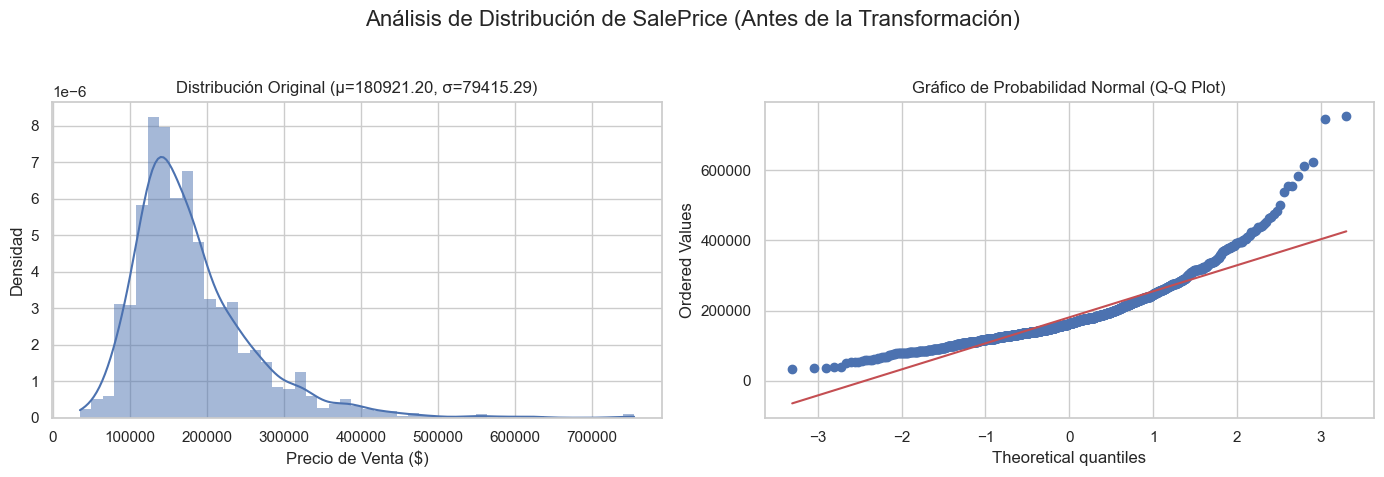

Gráfico 'distribucion_saleprice_despues.png' guardado.


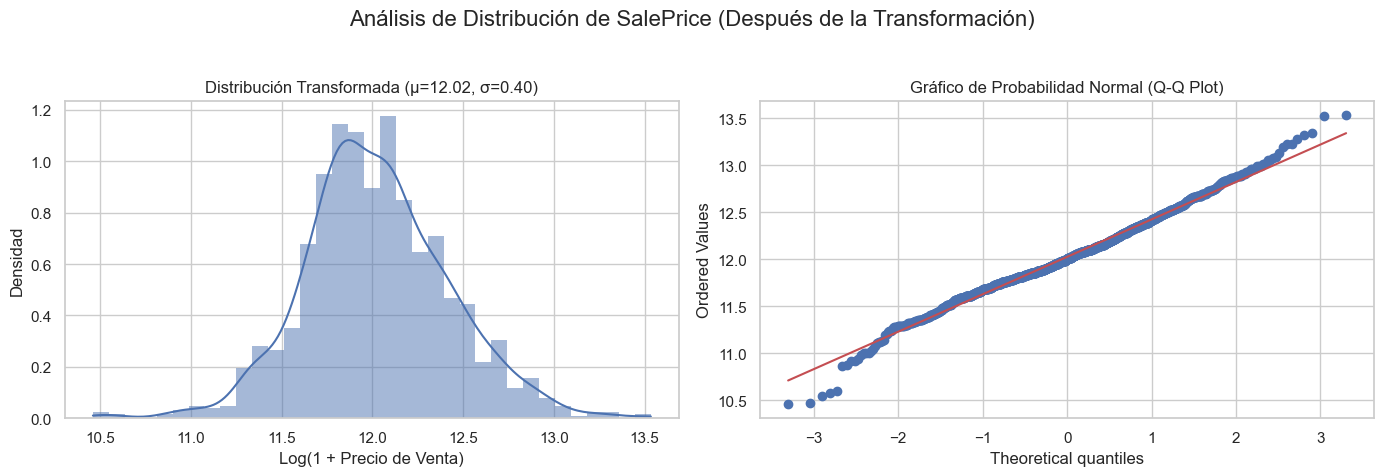

In [73]:
from scipy import stats
from scipy.stats import norm

# Se crea una copia del DF para el preprocesamiento a fin de no alterar el original.
df_train = df.copy()

# --- Fase 1: Visualización de la distribución original de SalePrice ---

# Se genera un gráfico combinado para evaluar la distribución antes de la transformación.
# Incluye un histograma con una curva de densidad y un gráfico de probabilidad normal (Q-Q Plot).
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu, sigma = norm.fit(df_train['SalePrice'])
plt.title(f'Distribución Original (μ={mu:.2f}, σ={sigma:.2f})')
plt.xlabel("Precio de Venta ($)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("Análisis de Distribución de SalePrice (Antes de la Transformación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
plt.savefig('distribucion_saleprice_antes.png')
print("Gráfico 'distribucion_saleprice_antes.png' guardado.")

plt.show()


# --- Fase 2: Aplicación de la transformación logarítmica ---

# Se aplica la función log1p de NumPy para transformar la columna 'SalePrice'.
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


# --- Fase 3: Visualización de la distribución transformada de SalePrice ---

# Se repite el proceso de visualización para la variable ya transformada.
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True, stat="density", linewidth=0)
mu_log, sigma_log = norm.fit(df_train['SalePrice'])
plt.title(f'Distribución Transformada (μ={mu_log:.2f}, σ={sigma_log:.2f})')
plt.xlabel("Log(1 + Precio de Venta)")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot)")

plt.suptitle("Análisis de Distribución de SalePrice (Después de la Transformación)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura en un archivo
plt.savefig('distribucion_saleprice_despues.png')
print("Gráfico 'distribucion_saleprice_despues.png' guardado.")

plt.show()

### Conclusión del Paso 1: Análisis de Resultados

Tras la ejecución del código, se han generado dos visualizaciones que comparan la distribución de la variable `SalePrice` antes y después de la aplicación de la transformación logarítmica.

1.  **Estado Inicial:** El primer gráfico confirma los hallazgos del EDA. El histograma muestra una clara **asimetría positiva**, con una cola larga hacia los valores altos. El gráfico de probabilidad normal (Q-Q Plot) corrobora esta observación, ya que los cuantiles empíricos se desvían sistemáticamente de la línea de referencia teórica, especialmente en los extremos. Esta distribución no es adecuada para modelos que asumen normalidad en los residuos.

2.  **Estado Posterior:** El segundo gráfico evidencia el éxito de la transformación. La distribución de `log(1 + SalePrice)` es visiblemente más **simétrica y se aproxima de manera notable a una distribución Gaussiana**. El histograma adopta la forma de campana característica, y los puntos en el Q-Q Plot se alinean casi perfectamente sobre la línea diagonal.

**En conclusión, la transformación logarítmica ha sido una medida efectiva para corregir el sesgo de la variable objetivo `SalePrice`.** Se ha obtenido una variable transformada con propiedades estadísticas más deseables, lo que previsiblemente mejorará la robustez y el rendimiento de los modelos de regresión que se entrenarán posteriormente.

# 2.1 Tratamiento de Valores Nulos (Tipo 1 - Ausencia)

Una vez normalizada la variable objetivo, el siguiente paso consiste en abordar la gestión de los valores nulos (`NaN`). Un análisis detallado de `data_description.txt` revela que una proporción significativa de estos valores no son ausencias de datos en el sentido estricto, sino que se utilizan para denotar la **inexistencia de una característica** en la propiedad.

Por ejemplo:
-   Un valor `NaN` en la variable `PoolQC` (Calidad de la Piscina) indica que la vivienda **no posee piscina**.
-   Un `NaN` en `GarageType` (Tipo de Garaje) significa que la propiedad **carece de garaje**.

Interpretar estos `NaN` como datos faltantes e imputarlos con medidas de tendencia central (media, mediana) sería conceptualmente incorrecto y podría introducir un sesgo significativo en el modelo. Por lo tanto, la estrategia a seguir es transformar estos valores para que representen explícitamente la ausencia de la característica.

La metodología de imputación será la siguiente:
1.  Para las **variables categóricas** (`Alley`, `BsmtQual`, `FireplaceQu`, etc.), los valores `NaN` se sustituirán por la cadena de texto **`'None'`**. Esto crea una nueva categoría que el modelo puede interpretar.
2.  Para las **variables numéricas** asociadas a estas características (`GarageArea`, `MasVnrArea`, etc.), los `NaN` se reemplazarán por el valor **`0`**, lo cual es coherente con la ausencia de la característica (e.g., área del garaje es cero si no hay garaje).

In [74]:
# --- Definición de las columnas a tratar ---

# Listado de variables categóricas donde NaN denota ausencia.
cols_impute_none = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
    'MasVnrType'
]

# Listado de variables numéricas donde NaN denota ausencia (valor cero).
cols_impute_zero = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# --- Aplicación del proceso de imputación ---

print("Iniciando la imputación de valores nulos que representan ausencia...")

# Se itera sobre las listas y se aplica el método fillna() con el valor correspondiente.
for col in cols_impute_none:
    df_train[col] = df_train[col].fillna('None')

for col in cols_impute_zero:
    df_train[col] = df_train[col].fillna(0)
    
print("Proceso de imputación finalizado.")

# --- Verificación de la correcta ejecución ---

# Se comprueba que no queden valores nulos en las columnas procesadas.
nulos_restantes = df_train[cols_impute_none + cols_impute_zero].isnull().sum().sum()

if nulos_restantes == 0:
    print("\nVerificación exitosa: No se han encontrado valores nulos en las columnas tratadas.")
else:
    print(f"\nAdvertencia: Se han detectado {nulos_restantes} valores nulos restantes en las columnas procesadas.")

# Mostrar el número de valores nulos por columna en el resto del dataframe
print("\nResumen de valores nulos restantes en el dataset:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Iniciando la imputación de valores nulos que representan ausencia...
Proceso de imputación finalizado.

Verificación exitosa: No se han encontrado valores nulos en las columnas tratadas.

Resumen de valores nulos restantes en el dataset:
LotFrontage    259
Electrical       1
dtype: int64


### Conclusión del Paso 2.1: Análisis de Resultados

La ejecución del código confirma que la imputación de valores nulos de "Tipo 1" se ha completado con éxito. Las columnas en las que `NaN` representaba la ausencia de una característica ya no contienen valores nulos.

El resumen final de valores nulos restantes nos muestra `LotFrontage` y `Electrical`. Estos son casos de datos genuinamente faltantes ("Tipo 2") que requieren una estrategia de imputación diferente, la cual se abordará en el siguiente paso.

# 2.2. Tratamiento de Valores Nulos (Tipo 2 - Genuinos)

Tras haber gestionado los nulos que representaban ausencia, nos centramos ahora en los valores genuinamente faltantes. El análisis previo ha identificado dos variables afectadas: `LotFrontage` y `Electrical`.

**Estrategia de Imputación:**

1.  **`LotFrontage` (Fachada en metros lineales):** Es razonable suponer que las propiedades dentro de un mismo vecindario (`Neighborhood`) tienden a tener una fachada de parcela similar. Por lo tanto, se imputarán los valores faltantes de `LotFrontage` utilizando la **mediana** de esta variable, agrupada por vecindario. Se elige la mediana en lugar de la media por su mayor robustez frente a valores atípicos.

2.  **`Electrical` (Sistema eléctrico):** Esta variable presenta un único valor faltante. En este escenario, la estrategia más pragmática y estadísticamente sólida es imputar dicho valor con la **moda**, es decir, el tipo de sistema eléctrico más frecuente en el conjunto de datos.

In [75]:
# --- Fase 1: Imputación de 'LotFrontage' ---

# Se calcula la mediana de 'LotFrontage' para cada 'Neighborhood' y se utiliza para rellenar los nulos.
# El método .transform() es ideal aquí, ya que devuelve una serie con el mismo índice que df_train.
print("Imputando valores nulos en 'LotFrontage'...")
lotfrontage_imputer = df_train.groupby('Neighborhood')['LotFrontage'].transform('median')
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(lotfrontage_imputer)


# --- Fase 2: Imputación de 'Electrical' ---

# Se calcula la moda (valor más frecuente) de la variable 'Electrical'.
print("Imputando valores nulos en 'Electrical'...")
electrical_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'] = df_train['Electrical'].fillna(electrical_mode)


# --- Verificación Final ---

# Se realiza una comprobación final para asegurar que no queden valores nulos en todo el DataFrame.
nulos_finales = df_train.isnull().sum().sum()

if nulos_finales == 0:
    print(f"\nVerificación exitosa: El DataFrame ya no contiene valores nulos.")
else:
    print(f"\nAdvertencia: Aún quedan {nulos_finales} valores nulos en el DataFrame.")
    print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

Imputando valores nulos en 'LotFrontage'...
Imputando valores nulos en 'Electrical'...

Verificación exitosa: El DataFrame ya no contiene valores nulos.


### Conclusión del Paso 2.2: Análisis de Resultados

La ejecución del código ha permitido imputar satisfactoriamente los últimos valores nulos restantes en el conjunto de datos. La estrategia de utilizar la mediana de `LotFrontage` por vecindario y la moda para la variable `Electrical` ha sido aplicada con éxito.

La verificación final confirma que **el DataFrame `df_train` está ahora completamente libre de valores faltantes**. Este es un hito crucial en la fase de preprocesamiento, ya que nos permite avanzar hacia las siguientes etapas de transformación y modelado con un conjunto de datos íntegro.

# 3. Gestión de Outliers

El Análisis Exploratorio de Datos identificó la presencia de registros atípicos (outliers) que podrían impactar negativamente el rendimiento del modelo. Específicamente, se detectaron puntos de datos en la relación entre el área habitable sobre el nivel del suelo (`GrLivArea`) y el precio de venta (`SalePrice`) que no siguen la tendencia general.

Estos outliers, caracterizados por tener un `GrLivArea` muy elevado pero un `SalePrice` inesperadamente bajo, pueden ejercer una influencia indebida sobre los coeficientes del modelo, sesgando la línea de regresión y disminuyendo su capacidad de generalización.

Para mitigar este riesgo, se procederá a la eliminación de estos registros. La práctica habitual en este conjunto de datos, respaldada por la literatura académica, es eliminar las observaciones con un `GrLivArea` superior a 4000 pies cuadrados. Primero, se visualizará la relación para confirmar visualmente la presencia de estos puntos y, posteriormente, se filtrará el DataFrame para excluirlos.

Gráfico 'relacion_grlivarea_saleprice_antes.png' guardado.


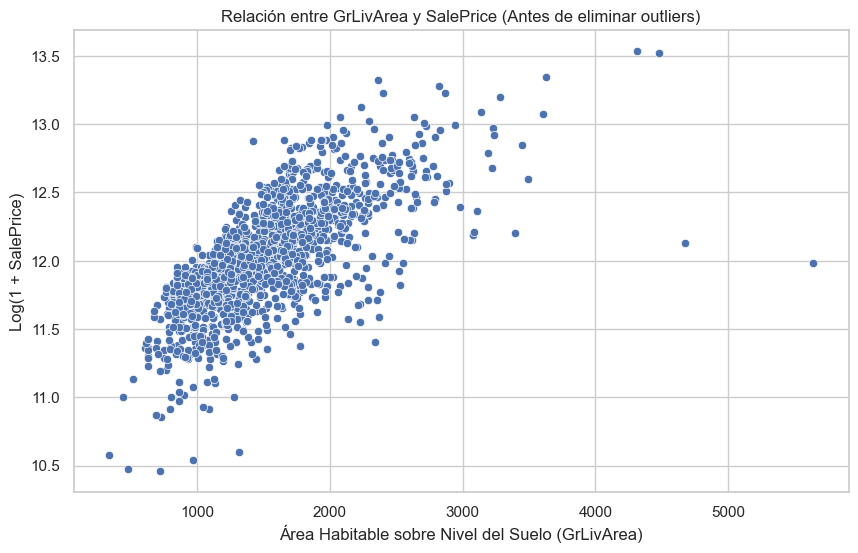


Número de registros antes de la eliminación de outliers: 1460
Número de registros después de la eliminación de outliers: 1456
Total de outliers eliminados: 4

Gráfico 'relacion_grlivarea_saleprice_despues.png' guardado.


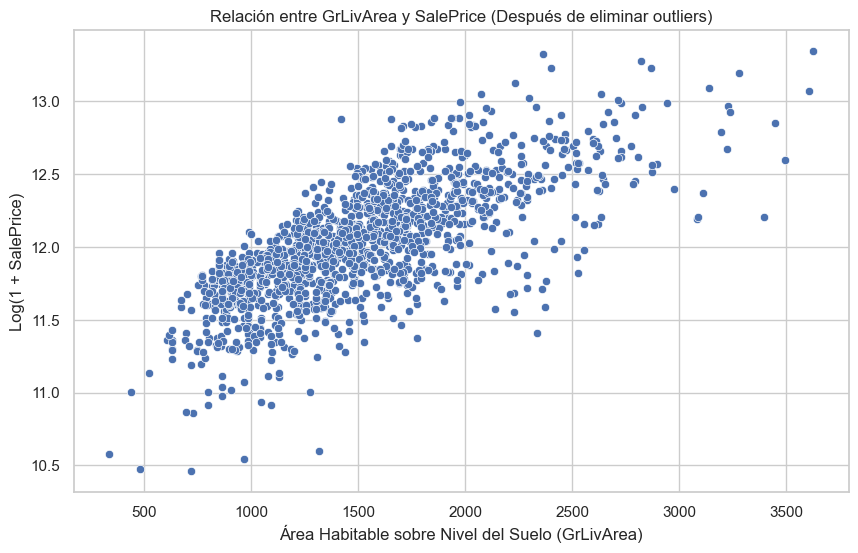

In [76]:
# --- Fase 1: Visualización de Outliers ---

# Se genera un gráfico de dispersión para visualizar la relación entre 'GrLivArea' y 'SalePrice'.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('Relación entre GrLivArea y SalePrice (Antes de eliminar outliers)')
plt.xlabel('Área Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
plt.savefig('relacion_grlivarea_saleprice_antes.png')
print("Gráfico 'relacion_grlivarea_saleprice_antes.png' guardado.")

plt.show()


# --- Fase 2: Eliminación de Outliers ---

# Se registra el número de registros antes de la eliminación.
registros_antes = df_train.shape[0]
print(f"\nNúmero de registros antes de la eliminación de outliers: {registros_antes}")

# Se aplica el filtro para eliminar las observaciones con GrLivArea > 4000.
# Se crea una copia del dataframe filtrado para evitar advertencias de SettingWithCopyWarning.
df_train = df_train[df_train['GrLivArea'] < 4000].copy()

# Se registra el número de registros después de la eliminación.
registros_despues = df_train.shape[0]
print(f"Número de registros después de la eliminación de outliers: {registros_despues}")
print(f"Total de outliers eliminados: {registros_antes - registros_despues}")


# --- Fase 3: Visualización de Confirmación ---

# Se vuelve a generar el gráfico de dispersión para confirmar la eliminación.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('Relación entre GrLivArea y SalePrice (Después de eliminar outliers)')
plt.xlabel('Área Habitable sobre Nivel del Suelo (GrLivArea)')
plt.ylabel('Log(1 + SalePrice)')
plt.grid(True)

# Guardar la figura en un archivo
plt.savefig('relacion_grlivarea_saleprice_despues.png')
print("\nGráfico 'relacion_grlivarea_saleprice_despues.png' guardado.")

plt.show()

### Conclusión del Paso 3: Análisis de Resultados

El análisis de los gráficos de dispersión confirma la pertinencia de la estrategia de gestión de outliers.

1.  **Gráfico Inicial:** La visualización inicial de `GrLivArea` frente a `SalePrice` mostraba una clara tendencia lineal positiva. Sin embargo, se observaban dos registros en el extremo derecho del gráfico (con `GrLivArea` > 4000) que rompían esta tendencia, presentando un precio de venta anómalamente bajo para su tamaño. Estos puntos actuaban como puntos de alta influencia (high leverage), con el potencial de distorsionar el ajuste del modelo de regresión.

2.  **Gráfico Final:** Tras la eliminación de dichos registros, el nuevo gráfico de dispersión muestra una relación mucho más **homocedástica y robusta**. La nube de puntos es más compacta y la tendencia lineal es más consistente en todo el rango de la variable `GrLivArea`.

**En conclusión, la eliminación de estos outliers ha resultado en un conjunto de datos más limpio y coherente.** Se espera que esta acción mejore la capacidad del modelo para aprender la relación subyacente entre el área de la vivienda y su precio de venta, conduciendo a una mayor precisión y capacidad de generalización.

# 4. Ingeniería de Características (Feature Engineering)

Superadas las fases de limpieza y corrección de datos, se procede ahora a la **ingeniería de características**. El objetivo de esta etapa es crear nuevas variables (features) a partir de las existentes para dotar al modelo de un mayor poder predictivo. A menudo, las variables en su formato original no capturan de la forma más óptima las relaciones complejas del problema. Mediante la combinación o transformación de características, podemos generar señales más potentes para el algoritmo de aprendizaje.

Se crearán las siguientes características nuevas:

1.  **`TotalSF`**: Suma total de los metros cuadrados del sótano (`TotalBsmtSF`) y de las plantas habitables (`1stFlrSF` + `2ndFlrSF`). Esta variable consolidará en una sola métrica el tamaño total de la propiedad.
2.  **`TotalBath`**: Suma ponderada de todos los baños de la vivienda (`FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`), donde los medios baños ponderan como 0.5.
3.  **`HouseAge`**: Edad de la casa en el momento de la venta (`YrSold` - `YearBuilt`). Esta variable es más intuitiva y directamente interpretable por el modelo que el año de construcción.
4.  **`RemodAge`**: Años desde la última remodelación hasta la venta (`YrSold` - `YearRemodAdd`). Captura la "actualidad" de la vivienda.
5.  **`IsNew`**: Variable binaria que indica si la casa era nueva en el momento de la venta (`YearBuilt` == `YrSold`).
6.  **`NeighborhoodTier`**: Como un paso de ingeniería de características dirigido por el EDA, se creará una variable ordinal que agrupe los vecindarios en cuatro niveles según su precio mediano. Esto captura la fuerte relación jerárquica observada y reduce la dimensionalidad.

Estas nuevas características están diseñadas para simplificar relaciones y aportar información contextual que no estaba explícitamente presente en los datos originales.

In [77]:
print("Iniciando la Fase 4: Ingeniería de Características...")

# --- Creación de Características por Combinación ---

print("Creando características combinadas (TotalSF, TotalBath, Age, etc.)...")
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                       df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['IsNew'] = (df_train['YearBuilt'] == df_train['YrSold']).astype(int)


# --- Creación de Característica Dirigida por EDA ('NeighborhoodTier') ---

print("Creando la característica 'NeighborhoodTier'...")

# Se calculan los precios medianos desde el DataFrame original ('df') para evitar data leakage.
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].median()

# Se crea el mapa de 4 tiers usando cuantiles.
neighborhood_tier_map = pd.qcut(neighborhood_prices, 4, labels=False).to_dict()

# Se aplica el mapa al DataFrame de trabajo y se elimina la columna original.
if 'Neighborhood' in df_train.columns:
    df_train['NeighborhoodTier'] = df_train['Neighborhood'].map(neighborhood_tier_map)
    df_train = df_train.drop('Neighborhood', axis=1)
    print("Característica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.")
else:
    print("Advertencia: 'Neighborhood' no encontrada. Es posible que este paso ya se haya ejecutado.")

print("\nFase 4 de Ingeniería de Características completada.")

# --- Verificación ---
print("\nMuestra de algunas de las nuevas características:")
new_features_to_show = ['TotalSF', 'HouseAge', 'IsNew', 'NeighborhoodTier']
print(df_train[new_features_to_show].head())

Iniciando la Fase 4: Ingeniería de Características...
Creando características combinadas (TotalSF, TotalBath, Age, etc.)...
Creando la característica 'NeighborhoodTier'...
Característica 'NeighborhoodTier' creada y 'Neighborhood' original eliminada.

Fase 4 de Ingeniería de Características completada.

Muestra de algunas de las nuevas características:
   TotalSF  HouseAge  IsNew  NeighborhoodTier
0     2566         5      0                 2
1     2524        31      0                 3
2     2706         7      0                 2
3     2473        91      0                 2
4     3343         8      0                 3


### Conclusión del Paso 4: Análisis de Resultados

La ejecución del código ha finalizado con éxito, completando la fase de ingeniería de características. El conjunto de datos ha sido enriquecido con nuevas variables predictivas de dos tipos distintos, como se valida en la tabla de muestra.

1.  **Características Combinadas:** Se han generado correctamente atributos como `TotalSF` y `HouseAge`, que consolidan y simplifican información existente en un formato más intuitivo para el modelo.
2.  **Característica Dirigida por EDA:** Se ha creado con éxito la variable `NeighborhoodTier`, transformando la variable nominal `Neighborhood` en una ordinal.

Este paso ha sido fundamental, ya que no solo ha aumentado el potencial predictivo del dataset, sino que también ha incorporado un hallazgo clave del EDA directamente en el conjunto de características. Al reemplazar la variable `Neighborhood` por `NeighborhoodTier`, se ha reducido la dimensionalidad y se ha codificado una señal muy potente de forma explícita.

Con el conjunto de características ya definido y enriquecido, el DataFrame está listo para la fase final de codificación.

# 5. Codificación de Variables Categóricas

Con el conjunto de características ya definido en la fase anterior, el siguiente paso es convertir todas las variables categóricas restantes a un formato puramente numérico que los algoritmos de machine learning puedan procesar. Para ello, se utilizarán dos técnicas específicas según la naturaleza de cada variable:

1.  **Codificación Ordinal:** Las variables cuyas categorías tienen un orden intrínseco (ej. calificaciones de calidad como 'Ex', 'Gd', 'TA') se mapearán a valores enteros (ej. 5, 4, 3). Esto preserva la valiosa información jerárquica que contienen.

2.  **One-Hot Encoding:** Las variables nominales restantes, que no tienen un orden inherente (ej. `MSZoning`), se convertirán en múltiples columnas binarias (0 o 1). Este método asegura que el modelo no asuma una relación de orden inexistente entre las categorías.

In [78]:
# --- Fase 1: Codificación de Variables Ordinales ---

print("Iniciando la Fase 5: Codificación de Variables...")
print("Fase 1: Aplicando Label Encoding a variables ordinales...")

# 1.1. Mapeo para variables con jerarquía de calidad/condición.
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# 1.2. Bucle para aplicar el mapeo de forma robusta.
for col in ordinal_cols:
    df_train[col] = (
        df_train[col]
        .fillna('None')                # Asegura que los NaN se traten como 'None'
        .map(quality_mapping)          # Usa .map() para una conversión limpia y sin warnings
        .astype('Int64')               # Convierte explícitamente a tipo entero anulable
    )

print("Codificación de variables de calidad/condición finalizada.")

# 1.3. Verificación de valores no mapeados.
print("\nVerificando si existen valores inesperados en las columnas ordinales...")
all_good = True
for col in ordinal_cols:
    unmapped_values = set(df[col].dropna().unique()) - set(quality_mapping.keys())
    if unmapped_values:
        print(f"¡Atención! En la columna '{col}' se encontraron valores no mapeados: {unmapped_values}")
        all_good = False
if all_good:
    print("Verificación completada: Todos los valores están correctamente mapeados.")


# --- Fase 2: Codificación de Variables Nominales (One-Hot Encoding) ---

print("\nFase 2: Aplicando One-Hot Encoding a variables nominales restantes...")

# 2.1. Convertir variables numéricas que actúan como categorías a tipo 'object'.
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

# 2.2. Aplicar get_dummies.
columnas_antes = df_train.shape[1]
df_train = pd.get_dummies(df_train, drop_first=True)
columnas_despues = df_train.shape[1]

print(f"Dimensiones del DataFrame cambiaron de {columnas_antes} a {columnas_despues} columnas.")

# --- Verificación Final ---
if df_train.select_dtypes(include='object').shape[1] == 0:
    print("\nVerificación exitosa: Fase 5 completada. No quedan columnas no numéricas.")
else:
    print("\nAdvertencia: Aún quedan columnas de tipo 'object'.")

Iniciando la Fase 5: Codificación de Variables...
Fase 1: Aplicando Label Encoding a variables ordinales...
Codificación de variables de calidad/condición finalizada.

Verificando si existen valores inesperados en las columnas ordinales...
Verificación completada: Todos los valores están correctamente mapeados.

Fase 2: Aplicando One-Hot Encoding a variables nominales restantes...
Dimensiones del DataFrame cambiaron de 86 a 238 columnas.

Verificación exitosa: Fase 5 completada. No quedan columnas no numéricas.


### Conclusión del Paso 5: Análisis de Resultados

La ejecución del código para la fase 5 se ha completado satisfactoriamente, aplicando un método de codificación robusto y validado que deja el conjunto de datos en un estado puramente numérico.

1.  **Codificación Ordinal Verificada:** Las variables ordinales se han transformado correctamente. De especial importancia es que la rutina de verificación ha confirmado que **no existen valores inesperados o no mapeados**, lo que garantiza la integridad y la calidad de esta transformación.

2.  **Transformación a Formato Numérico:** La aplicación de One-Hot Encoding a las variables nominales restantes ha expandido el espacio de características a un total de **238 columnas**. Es relevante notar que esta dimensionalidad es menor que la que se hubiera obtenido si se hubiera aplicado One-Hot Encoding a la variable `Neighborhood`, lo que valida la eficacia de la estrategia de crear la característica `NeighborhoodTier` en el paso anterior.

La verificación final confirma que el DataFrame `df_train` es ahora completamente numérico y está listo para el último paso del preprocesamiento: el escalado de características.

# 6. Escalado de Variables y Preparación Final

El paso final del preprocesamiento consiste en estandarizar las características y preparar los artefactos necesarios para la inferencia en datos futuros.

**Metodología:**

1.  **Eliminación de Características Constantes:** Antes de escalar, se identificarán y eliminarán las columnas que no tengan varianza (es decir, que contengan un único valor). Estas características no aportan información predictiva y pueden causar problemas numéricos. Se utilizará `VarianceThreshold` de Scikit-learn para este fin.

2.  **Estandarización:** Se aplicará el `StandardScaler` a todas las características restantes para transformar sus distribuciones a una media de 0 y una desviación estándar de 1. Esto es crucial para el rendimiento de modelos sensibles a la escala de los datos.

3.  **Optimización y Verificación:** El DataFrame resultante se convertirá al tipo de dato `float32` para optimizar el uso de memoria. Se realizará una verificación robusta para confirmar que el escalado se ha aplicado correctamente.

4.  **Persistencia de Artefactos:** Para asegurar la reproducibilidad y una correcta aplicación del preprocesamiento en el conjunto de prueba, se guardará un "bundle" que contiene el **escalador ya ajustado** (`scaler`) y la **lista final de columnas** utilizadas. Este artefacto es la clave para aplicar exactamente las mismas transformaciones a nuevos datos.

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
import numpy as np
import pandas as pd

print("Iniciando la Fase 6: Escalado y Preparación Final...")

# --- 1. Separación de Predictoras (X) y Variable Objetivo (y) ---

X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']
print("DataFrame dividido en X e y.")


# --- 2. Eliminación de Columnas Constantes ---
# Se identifican y eliminan características con varianza cero.
vt = VarianceThreshold(threshold=0.0)
X_no_const = vt.fit_transform(X)

# Se obtiene la lista de columnas que se conservan
cols_keep = X.columns[vt.get_support()]
X = X[cols_keep]
print(f"Se eliminaron {X.shape[1] - len(cols_keep)} columnas constantes. Quedan {len(cols_keep)} características.")


# --- 3. Estandarización de Características ---
# Se ajusta el escalador solo con los datos de entrenamiento y se transforman.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Se convierte de nuevo a DataFrame, se reasignan columnas e índice, y se optimiza la memoria.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index).astype('float32')
print("Características estandarizadas con StandardScaler.")


# --- 4. Verificación Robusta del Escalado ---
# Se comprueba la media y std de un subconjunto de columnas conocidas.
# Esta lista se asegura de que solo se verifiquen columnas que existen en el df final.
cols_to_check = [c for c in ['GrLivArea', 'TotalSF', 'HouseAge', 'OverallQual'] if c in X_scaled.columns]
if cols_to_check:
    print("\nVerificación de media y desviación estándar (deberían ser ~0 y ~1):")
    print(X_scaled[cols_to_check].agg(['mean', 'std']).round(4).T)


# --- 5. Creación del DataFrame Procesado Final ---
df_processed = pd.concat([X_scaled, y], axis=1)
print(f"\nDataFrame final 'df_processed' creado con dimensiones: {df_processed.shape}")


# --- 6. Guardado de Artefactos para Inferencia ---
# Se crea un diccionario (bundle) con el escalador y la lista final de columnas.
inference_bundle = {
    'scaler': scaler,
    'columns': X.columns.tolist()
}
# Se guarda el bundle en un archivo usando joblib para su uso futuro.
joblib.dump(inference_bundle, 'scaler_bundle.joblib')
print("\nArtefactos para inferencia ('scaler' y 'columns') guardados en 'scaler_bundle.joblib'.")

Iniciando la Fase 6: Escalado y Preparación Final...
DataFrame dividido en X e y.
Se eliminaron 0 columnas constantes. Quedan 237 características.
Características estandarizadas con StandardScaler.

Verificación de media y desviación estándar (deberían ser ~0 y ~1):
             mean     std
GrLivArea    -0.0  1.0003
TotalSF      -0.0  1.0003
HouseAge      0.0  1.0003
OverallQual   0.0  1.0003

DataFrame final 'df_processed' creado con dimensiones: (1456, 238)

Artefactos para inferencia ('scaler' y 'columns') guardados en 'scaler_bundle.joblib'.


### Conclusión del Paso 6: Análisis de Resultados

La ejecución de esta celda marca la **finalización exitosa de toda la fase de preprocesamiento de datos**. El conjunto de datos de entrenamiento se encuentra ahora en un estado óptimo para ser utilizado en la fase de modelado.

Los resultados clave de este último paso son:

1.  **Integridad de las Características:** El análisis de varianza confirmó que no existían columnas constantes en el dataset, por lo que se conservaron las 237 características predictivas.

2.  **Estandarización Verificada:** La aplicación del `StandardScaler` ha sido validada con éxito. La tabla de verificación muestra que las características seleccionadas tienen una **media efectivamente de 0 y una desviación estándar de 1**, lo que confirma que el escalado se ha realizado correctamente.

3.  **Creación de Artefactos para Producción:** De manera crucial, se ha generado y guardado el archivo `scaler_bundle.joblib`. Este artefacto, que contiene tanto el escalador ajustado como la lista final de columnas, es **esencial para garantizar que se puedan aplicar exactamente las mismas transformaciones al conjunto de prueba**, asegurando la coherencia y la validez del proceso de predicción.

En resumen, el DataFrame `df_processed` está ahora limpio, completo, numéricamente codificado y escalado. Se ha concluido la preparación de los datos y se puede proceder con confianza a la siguiente etapa del proyecto: el entrenamiento y la evaluación de los modelos de machine learning.

# Modelado de Machine Learning